In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import pprint
from copy import deepcopy

import sys
sys.path.append("../src")
from lost_in_the_middle.prompting import (
    Document,
    get_closedbook_qa_prompt,
    get_qa_prompt,
)

In [2]:
pp = pprint.PrettyPrinter(indent=2)

In [3]:
! ls ../qa_data

10_total_documents      30_total_documents      nq-open-oracle.jsonl.gz
20_total_documents      nq-open-oracle.jsonl


In [3]:
# Create an empty list to store the dictionaries
data_list = []

# Open the JSONL file
with open('../qa_data/20_total_documents/nq-open-20_total_documents_gold_at_0.jsonl', 'r') as jsonl_file:
    # Read the file line by line
    for line in jsonl_file:
        # Parse each line as a JSON object and append it to the list
        data = json.loads(line)
        data_list.append(data)


In [6]:
len(data_list)

2655

In [4]:
all_prompts = []
all_questions = [0]
all_documents = []
all_answers = []

for input_example in data_list:
    question = input_example["question"]
    documents = []
    for ctx in deepcopy(input_example["ctxs"]):
        documents.append(Document.from_dict(ctx))
        
    prompt = get_qa_prompt(
                question,
                documents,
                mention_random_ordering=False,
                query_aware_contextualization=True,
                cot_prompting=False
            )
    all_prompts.append(prompt)
    all_questions.append(question)
    all_documents.append(documents)
    all_answers.append(input_example["answers"])
    

In [5]:
len(all_documents)

2655

# Answer length distributions

In [9]:
all_answers[:10]

[['Wilhelm Conrad Röntgen'],
 ['May 18, 2018'],
 ['till September'],
 ['hit points or health points'],
 ['Cyrus'],
 ['Xiu Li Dai', 'Dai Xiuli', 'Dai Yongge', 'Yongge Dai'],
 ['Super Bowl LII,', '2017'],
 ['291 episodes', '291'],
 ['planner Raymond Unwin', 'architect Barry Parker', 'Raymond Unwin'],
 ['photoreceptor proteins that sense light', 'eyespots']]

In [10]:
answer_lengts = [len(a) for a in all_answers]
np.average(answer_lengts)

1.7529190207156309

Text(0, 0.5, 'Frequency')

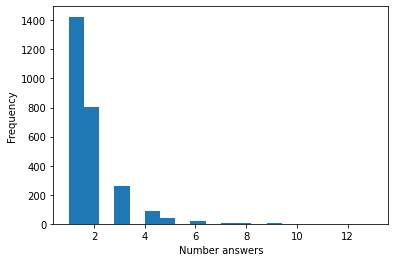

In [11]:
plt.hist(answer_lengts, bins=20, density=False)
plt.xlabel("Number answers")
plt.ylabel("Frequency")

# Prompts

In [12]:
from transformers import GPT2Tokenizer

In [13]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")  # You can use other GPT-2 variants as well

In [14]:
tokenized_prompts = []
for prompt in all_prompts:
    tokenized_text = tokenizer.encode(prompt, add_special_tokens=True)
    tokenized_prompts.append(tokenized_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (2998 > 1024). Running this sequence through the model will result in indexing errors


In [15]:
tokenized_prompts_lengths = [len(x) for x in tokenized_prompts]

In [21]:
print("Average number of tokens per prompt: {:.2f}".format(np.average(tokenized_prompts_lengths)))
print("Min number of tokens per prompt: {:.2f}".format(np.min(tokenized_prompts_lengths)))
print("Max number of tokens per prompt: {:.2f}".format(np.max(tokenized_prompts_lengths)))
print("Total number of tokens for all prompts {:.2f}".format(np.sum(tokenized_prompts_lengths)))

Average number of tokens per prompt: 2906.23
Min number of tokens per prompt: 2540.00
Max number of tokens per prompt: 3884.00
Total number of tokens for all prompts 7716047.00


Text(0, 0.5, 'Frequency')

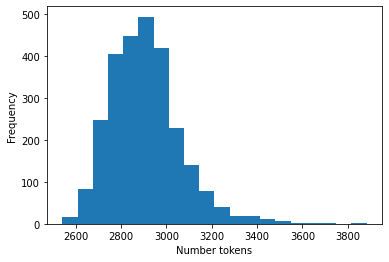

In [22]:
plt.hist(tokenized_prompts_lengths, bins=20, density=False)
plt.xlabel("Number tokens")
plt.ylabel("Frequency")

# Prompts

In [29]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")  # You can use other GPT-2 variants as well

In [30]:
tokenized_prompts = []
for prompt in all_prompts:
    tokenized_text = tokenizer.encode(prompt, add_special_tokens=True)
    tokenized_prompts.append(tokenized_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (1527 > 1024). Running this sequence through the model will result in indexing errors


In [31]:
tokenized_prompts_lengths = [len(x) for x in tokenized_prompts]

In [32]:
print("Average number of tokens per prompt: {:.2f}".format(np.average(tokenized_prompts_lengths)))
print("Min number of tokens per prompt: {:.2f}".format(np.min(tokenized_prompts_lengths)))
print("Max number of tokens per prompt: {:.2f}".format(np.max(tokenized_prompts_lengths)))
print("Total number of tokens for all prompts {:.2f}".format(np.sum(tokenized_prompts_lengths)))

Average number of tokens per prompt: 1465.00
Min number of tokens per prompt: 1240.00
Max number of tokens per prompt: 1963.00
Total number of tokens for all prompts 3889583.00


Text(0, 0.5, 'Frequency')

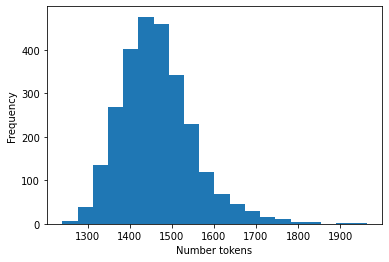

In [33]:
plt.hist(tokenized_prompts_lengths, bins=20, density=False)
plt.xlabel("Number tokens")
plt.ylabel("Frequency")

In [34]:
a = [1,2,3, 4, 5, 6, 7, 8, 9]
gold_idx = 0
new_idx = 2
new_a = list(a[1:new_idx + 1]) + [a[gold_idx]] + list(a[new_idx + 1:])

In [35]:
len(new_a), len(a)

(9, 9)

In [36]:
len(set(new_a)) == len(new_a) == len(a)

True

In [37]:
new_a

[2, 3, 1, 4, 5, 6, 7, 8, 9]